In [6]:
from kaleido.scopes.plotly import PlotlyScope
import optuna
import plotly
import plotly.express as px
import pandas as pd
study = optuna.create_study(study_name='Study_ALL',sampler=optuna.samplers.TPESampler(), 
                            pruner=optuna.pruners.HyperbandPruner(), storage='sqlite:///optuna.db',load_if_exists=True)

[I 2020-07-18 22:29:17,706] Using an existing study with name 'Study_ALL' instead of creating a new one.


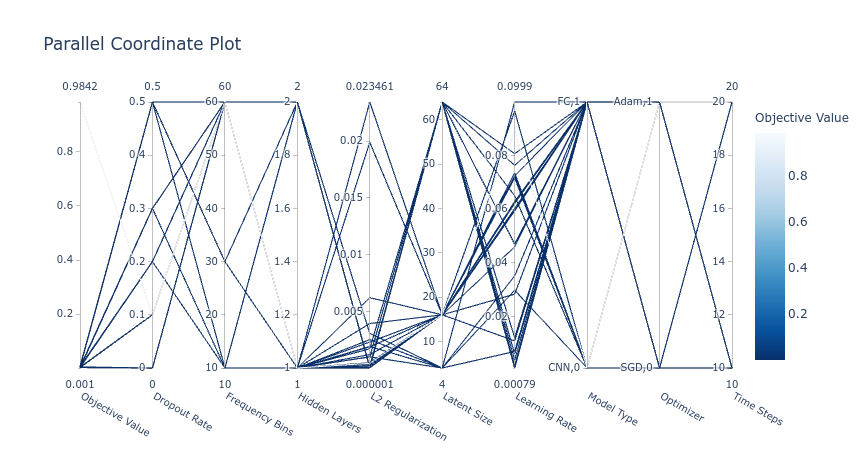

In [7]:

scope = PlotlyScope()
fig=optuna.visualization.plot_parallel_coordinate(study)
with open("figure2.svg", "wb") as f:
    f.write(scope.transform(fig, format="svg"))
fig

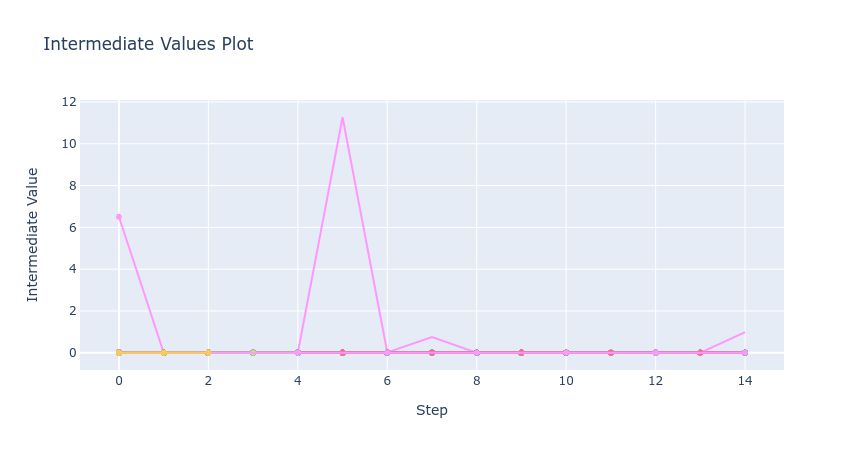

In [8]:
scope = PlotlyScope()

fig=optuna.visualization.plot_intermediate_values(study)
with open("figure2.svg", "wb") as f:
    f.write(scope.transform(fig, format="svg"))
fig

In [11]:
print('Best trial until now:')
print(' Value: ', study.best_trial.value)
print(' Params: ')
for key, value in study.best_trial.params.items():
    print(f'    {key}: {value}')

Best trial until now:
 Value:  0.0009993373123992888
 Params: 
    Dropout Rate: 0.30000000000000004
    Frequency Bins: 60
    Hidden Layers: 1
    L2 Regularization: 1.87978917284054e-06
    Latent Size: 64
    Learning Rate: 0.0013476937625583791
    Model Type: FC
    Optimizer: Adam
    Time Steps: 10


In [ ]:
import plotly.graph_objects as go
import numpy as np
np.random.seed(1)
scope = PlotlyScope()
N = 20
fig = go.Figure(data=[go.Mesh3d(x=(70*np.random.randn(N)),
                   y=(55*np.random.randn(N)),
                   z=(40*np.random.randn(N)),
                   opacity=0.5,
                   color='rgba(244,22,100,0.6)'
                  )])

fig.update_layout(scene = dict(
                    camera=dict(eye=dict(x=-1, y=-1, z=0)),
                    aspectmode="cube",),
                    margin=dict( r=0, l=0, b=0, t=0),
                    
                  )

fig.show()
with open("figure3.svg", "wb") as f:
    f.write(scope.transform(fig, format="svg"))

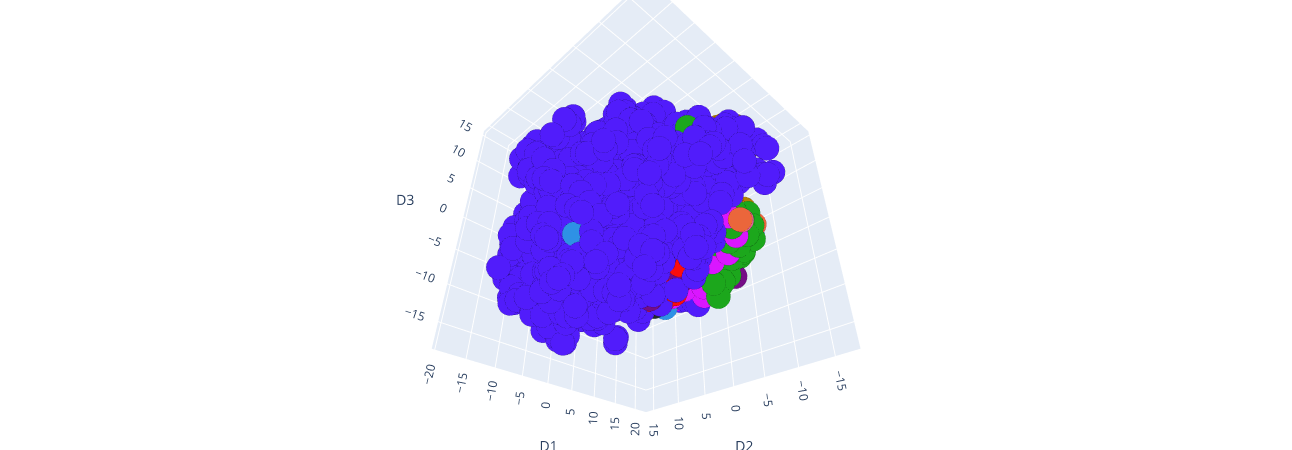

In [ ]:

scope = PlotlyScope()
df=pd.read_csv("csvs/df_8.csv",index_col=False)
fig = px.scatter_3d(df, x="D1",y="D2",z="D3",color="drum_type",hover_data=["path"],color_discrete_sequence=px.colors.qualitative.Dark24)
fig.update_layout(scene = dict(
                    camera=dict(eye=dict(x=-1.2, y=-1.2, z=-1.2)),
                    aspectmode="cube",),
                    margin=dict( r=0, l=0, b=0, t=0),
                  showlegend=False,
              legend=dict(
                yanchor="top",
                y=0.99,
                xanchor="right",
                x=0.01
            ),

                 )
fig.update_traces(marker=dict(size=8,
                      line=dict(width=0.1,
                                color='DarkSlateGrey')),)

g=fig
fig.show()


with open("figure6.svg", "wb") as f:
    f.write(scope.transform(fig, format="svg"))